## For data cleaning and exploratory data analysis

In [671]:
import numpy as np 
import pandas as pd
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt

In [192]:
data = pd.read_csv("alldata.csv", index_col = 0)

In [193]:
data.index = np.arange(len(data))

In [194]:
data = data.drop("Unnamed: 0.1", 1)

In [195]:
hier = np.vectorize(lambda x : 1 if "-" in x else len(x) - 1)
data["level"] = hier(data["NAICS.id"])

In [196]:
len(data["NAICS.display-label"].unique())

105

In [197]:
level1_name = set(data["NAICS.display-label"][data["level"] == 1])
level2_name = set(data["NAICS.display-label"][data["level"] == 2])
level3_name = set(data["NAICS.display-label"][data["level"] == 3])
level4_name = set(data["NAICS.display-label"][data["level"] == 4])
level5_name = set(data["NAICS.display-label"][data["level"] == 5])
level1_id = set(data["NAICS.id"][data["level"] == 1])
level2_id = set(data["NAICS.id"][data["level"] == 2])
level3_id = set(data["NAICS.id"][data["level"] == 3])
level4_id = set(data["NAICS.id"][data["level"] == 4])
level5_id = set(data["NAICS.id"][data["level"] == 5])

In [212]:
append0 = np.vectorize(lambda x : str(x) if len(str(x)) == 5 else "0" + str(x))
data["zip"] = append0(data["zip"])

<BarContainer object of 5 artists>

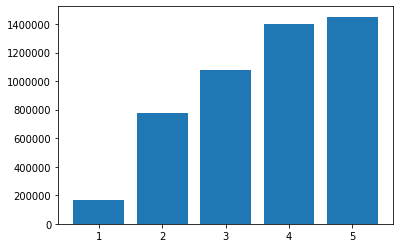

In [199]:
plt.bar(5-np.arange(len(data["level"].value_counts())), data["level"].value_counts())

In [200]:
# data["level"].value_counts()
data.columns

Index(['zip', 'NAICS.id', 'NAICS.display-label', 'RCPSZFE.display-label',
       'ESTAB', 'City Name', 'State', 'level'],
      dtype='object')

In [201]:
inter_45 = level4_name.intersection(level5_name)
inter_34 = level3_name.intersection(level4_name)
inter_23 = level2_name.intersection(level3_name)
r = np.arange(len(data))
l5 = data[data["level"] == 5]

In [202]:
data.loc[16, "NAICS.display-label"]
get_labels = np.vectorize(lambda x : x in inter_45)
labels = get_labels(l5["NAICS.display-label"])
idx2drop = l5.index[labels]

In [203]:
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [208]:
l4 = data[data["level"] == 4]
get_labels = np.vectorize(lambda x : x in inter_34)
labels = get_labels(l4["NAICS.display-label"])
idx2drop = l4.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [210]:
l3 = data[data["level"] == 3]
get_labels = np.vectorize(lambda x : x in inter_23)
labels = get_labels(l3["NAICS.display-label"])
idx2drop = l3.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [219]:
level1_name = set(data["NAICS.display-label"][data["level"] == 1])
level2_name = set(data["NAICS.display-label"][data["level"] == 2])
level3_name = set(data["NAICS.display-label"][data["level"] == 3])
level4_name = set(data["NAICS.display-label"][data["level"] == 4])
level5_name = set(data["NAICS.display-label"][data["level"] == 5])
level1_id = set(data["NAICS.id"][data["level"] == 1])
level2_id = set(data["NAICS.id"][data["level"] == 2])
level3_id = set(data["NAICS.id"][data["level"] == 3])
level4_id = set(data["NAICS.id"][data["level"] == 4])
level5_id = set(data["NAICS.id"][data["level"] == 5])

In [267]:
labels = list(data["RCPSZFE.display-label"] == 'Establishments not operated for the entire year')
idx2drop = data.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [281]:
labels = list(data["RCPSZFE.display-label"] ==  'Establishments operated for the entire year')
idx2drop = data.index[labels]
data = data.drop(idx2drop,0) 
data.index = np.arange(len(data))

In [282]:
values = data["RCPSZFE.display-label"].unique()
values

array(['All establishments',
       'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999',
       'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999',
       'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999',
       'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more',
       'Establishments operated entire year with sales/receipts/revenue less than $100,000'],
      dtype=object)

In [283]:
weight_dict = {'All establishments' : 0,
          'Establishments operated entire year with sales/receipts/revenue less than $100,000' : 0.5,
          'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999': 1,
          'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999' : 2,
          'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999' : 4,
          'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more' : 8
         }

In [302]:
scale_dict = {'All establishments' : "Total",
          'Establishments operated entire year with sales/receipts/revenue less than $100,000' : "E",
          'Establishments operated entire year with sales/receipts/revenue of $100,000 to $249,999': "D",
          'Establishments operated entire year with sales/receipts/revenue of $250,000 to $499,999' : "C",
          'Establishments operated entire year with sales/receipts/revenue of $500,000 to $999,999' : "B",
          'Establishments operated entire year with sales/receipts/revenue of $1,000,000 or more' : "A"
         }

In [285]:
give_weight = np.vectorize(lambda x : weight_dict[x])
data['weight'] = give_weight(data["RCPSZFE.display-label"])

In [304]:
give_cat = np.vectorize(lambda x : scale_dict[x])
data['scale'] = give_cat(data["RCPSZFE.display-label"])

<BarContainer object of 405 artists>

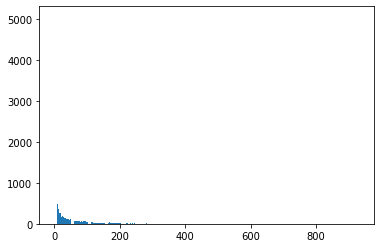

In [552]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]["ESTAB"]
# # plt.hist(temp)
dist = dict(temp.value_counts())
l = sorted(dist.items(), key = lambda x : x[0])
num = [pair[0] for pair in l]
count = [pair[1] for pair in l]
plt.bar(x=num, height=count)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

array([0.17357104, 0.27311761, 0.33738664, 0.38736603, 0.42271228,
       0.45201292, 0.47619538, 0.49742374, 0.51490794, 0.53115554,
       0.54633828, 0.55987222, 0.57189475, 0.58223413, 0.59271091,
       0.60167628, 0.61064166, 0.61946963, 0.62816021, 0.63557983,
       0.64293075, 0.64880462, 0.65546854, 0.6623042 , 0.66876202,
       0.67539159, 0.68150591, 0.68686452, 0.69212009, 0.6968604 ,
       0.70184117, 0.70719978, 0.71204314, 0.71657736, 0.72090547,
       0.72526793, 0.72952734, 0.73471421, 0.73797747, 0.74192773,
       0.74560319, 0.7491756 , 0.75278236, 0.75645782, 0.75982413,
       0.76322479, 0.76635065, 0.76982001, 0.77356417, 0.77669002,
       0.77967848, 0.78235779, 0.78589585, 0.78905606, 0.79249107,
       0.79513603, 0.79802143, 0.80107859, 0.80358615, 0.80674636,
       0.80935697, 0.81196757, 0.81492168, 0.81784144, 0.8202116 ,
       0.8230283 , 0.82467711, 0.82684117, 0.82903957, 0.83116928,
       0.83340203, 0.83570349, 0.8383828 , 0.84034075, 0.84250

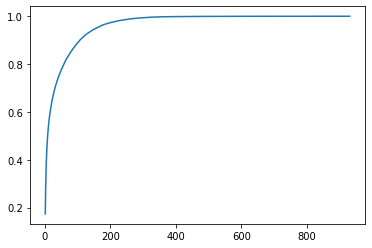

In [562]:
# print(np.array(dist.values))
# count
print(num)
y = np.cumsum(count)
cdf = y / y[-1]
plt.plot(num, cdf)
cdf

In [640]:
#### Equal Breath Binning
## 25 th percentile 
num=np.array(num)
per_25 = 3
## 50 th percentile
per_50 = num[abs(cdf - 0.50) < 0.003][0]

## 75 th percentile
per_75 = num[abs(cdf - 0.75) < 0.001][0]


In [638]:
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
temp

,zip,NAICS.id,NAICS.display-label,RCPSZFE.display-label,ESTAB,City Name,State,level,weight,scale,city scale
0,06001,44-45,Retail trade,All establishments,81,Avon,CT,1,0,Total,tiny
185,06002,44-45,Retail trade,All establishments,63,Bloomfield,CT,1,0,Total,large
342,06006,44-45,Retail trade,All establishments,1,Windsor,CT,1,0,Total,large
350,06010,44-45,Retail trade,All establishments,168,Bristol,CT,1,0,Total,tiny
616,06011,44-45,Retail trade,All establishments,2,Bristol,CT,1,0,Total,medium
631,06013,44-45,Retail trade,All establishments,11,Burlington,CT,1,0,Total,large
673,06016,44-45,Retail trade,All establishments,6,Broad Brook,CT,1,0,Total,small
697,06018,44-45,Retail trade,All establishments,17,Canaan,CT,1,0,Total,medium
768,06019,44-45,Retail trade,All establishments,78,Canton,CT,1,0,Total,large
944,06020,44-45,Retail trade,All establishments,1,Canton Center,CT,1,0,Total,tiny


In [641]:
scale_labeling = np.vectorize(lambda x : "tiny" if x <= per_25 else ("small" if x <= per_50 else ("medium" if x < per_75 else "large")))
scale = scale_labeling(temp["ESTAB"])
zips = temp["zip"]
zip2scale = {z : s for z, s in zip(zips, scale)}

In [642]:
scale_labeling = np.vectorize(lambda x : zip2scale.get(x, "small"))
data["city scale"] = scale_labeling(data["zip"])

In [643]:
# data["city scale"].value_counts()
temp = data[data["scale"] == "Total"]
temp = temp[temp["level"] == 1]
temp["city scale"].value_counts()

tiny      9822
large     7406
medium    7225
small     4659
Name: city scale, dtype: int64

In [644]:
data["city scale"].value_counts()

large     1455869
medium     527258
small      128738
tiny       100089
Name: city scale, dtype: int64

43725


<BarContainer object of 6 artists>

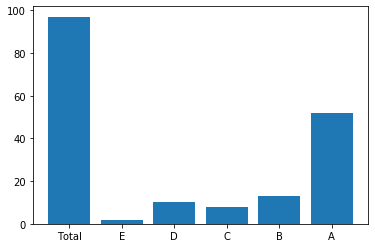

In [470]:
z = np.random.choice(all_zips)
z = data[data["zip"] == z]
z = z[z["level"] == 1]
x = z["scale"]
y = z["ESTAB"]
print(z["zip"].iloc[0])
plt.bar(x, y)

In [669]:
### Takes long to run!!!!!
zips = data["zip"].unique()
zip2tw = {z : 0 for z in zips}
count = 0 
for z in zip2tw.keys():
    df = data[data["zip"] == z]
    df = df[df["level"] == 1]
    est = np.array(df["ESTAB"])
    weight = np.array(df["weight"])
    zip2tw[z] = est.dot(weight)
    count += 1
    if count % 100 == 0:
        print(count)
zip2tw


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

{'06001': 388,
 '06002': 336,
 '06006': 8,
 '06010': 869,
 '06011': 9,
 '06013': 50,
 '06016': 32,
 '06018': 113,
 '06019': 451,
 '06020': 8,
 '06022': 22,
 '06023': 36,
 '06024': 3,
 '06026': 100,
 '06027': 0,
 '06029': 160,
 '06030': 8,
 '06031': 13,
 '06032': 1031,
 '06033': 531,
 '06035': 154,
 '06037': 380,
 '06039': 23,
 '06040': 1374,
 '06042': 398,
 '06043': 65,
 '06045': 16,
 '06050': 4,
 '06051': 365,
 '06052': 12,
 '06053': 280,
 '06057': 48,
 '06058': 16,
 '06061': 4,
 '06062': 357,
 '06063': 47,
 '06064': 4,
 '06065': 2,
 '06066': 579,
 '06067': 331,
 '06068': 38,
 '06069': 37,
 '06070': 193,
 '06071': 80,
 '06072': 8,
 '06073': 35,
 '06074': 645,
 '06075': 22,
 '06076': 178,
 '06078': 77,
 '06080': 8,
 '06081': 4,
 '06082': 945,
 '06083': 16,
 '06084': 140,
 '06085': 66,
 '06088': 272,
 '06089': 36,
 '06091': 24,
 '06092': 56,
 '06093': 14,
 '06095': 317,
 '06096': 170,
 '06098': 172,
 '06101': 1,
 '06103': 78,
 '06105': 132,
 '06106': 422,
 '06107': 379,
 '06108': 391,
 

In [658]:
# data[data["zip"] == "06010"]['RCPSZFE.display-label'][351]
a = data[data["zip"] == "06010"]
a = a[a['level'] == 1]

,zip,NAICS.id,NAICS.display-label,RCPSZFE.display-label,ESTAB,City Name,State,level,weight,scale,city scale
350,06010,44-45,Retail trade,All establishments,168,Bristol,CT,1,0,Total,large
351,06010,44-45,Retail trade,Establishments operated entire year with sales...,8,Bristol,CT,1,0,E,large
352,06010,44-45,Retail trade,Establishments operated entire year with sales...,11,Bristol,CT,1,1,D,large
353,06010,44-45,Retail trade,Establishments operated entire year with sales...,19,Bristol,CT,1,2,C,large
354,06010,44-45,Retail trade,Establishments operated entire year with sales...,27,Bristol,CT,1,4,B,large
355,06010,44-45,Retail trade,Establishments operated entire year with sales...,89,Bristol,CT,1,8,A,large


In [676]:
cuda = torch.device('cuda')
idx2zip = {i : z  for i,z in enumerate(zips)}
zip2idx = {z : i  for i,z in enumerate(zips)}
total_weights = np.zeros([len(zips), 1])
for k in zip2tw.keys():
    total_weights[zip2idx[k]] = zip2tw[k]

In [680]:
np.save("zip2tw.npy", total_weights)

In [713]:
zip2vec = np.zeros([len(zips), 12])
count = 0
for z in zip2tw.keys():
    df = data[data["zip"] == z]
    df = df[df["level"] == 2]
    vec = []
    for name in level2_name:
        sub_df = df[df["NAICS.display-label"] == name]
        if len(sub_df) == 0:
            vec.append(0)
            continue
#         print(sub_df)
        est = torch.from_numpy(sub_df["ESTAB"].values).double().to(cuda)
        weight = torch.from_numpy(sub_df["weight"].values).double().to(cuda)
        val = est.dot(weight)
        vec.append(val)
    zip2vec[zip2idx[z]] = vec
    count += 1

    if count % 100 == 0:
        break
#     est = np.array(df["ESTAB"])
#     weight = np.array(df["weight"])
#     zip2tw[z] = est.dot(weight)
    

In [714]:
zip2vec

array([[32., 32., 29., ..., 56., 56., 16.],
       [24., 35., 12., ...,  4., 64., 31.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [715]:
zip2vec[0]

array([32., 32., 29.,  0., 16., 10., 16., 78., 47., 56., 56., 16.])

In [716]:
zip2vec[1]

array([24., 35., 12., 44., 44., 28., 24., 24.,  2.,  4., 64., 31.])